In [4]:
import pandas as pd
mall= pd.read_csv("Mall_Customers.csv")

In [5]:
mall.head

<bound method NDFrame.head of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [6]:
mall.info

<bound method DataFrame.info of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [7]:
mall.describe

<bound method NDFrame.describe of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [8]:
mall.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
mall[1:3]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
2,3,Female,20,16,6


In [10]:
mall.shape

(200, 5)

mall.

In [11]:
mall.columns.values

array(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'], dtype=object)

In [12]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [13]:
x = mall.iloc[:,3:5]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [14]:
kmeans = KMeans(5)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
predict = kmeans.fit_predict(x)
predict

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [16]:
centroids = kmeans.cluster_centers_
centroids

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

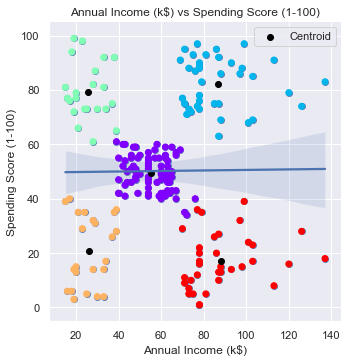

In [17]:
sns.lmplot(x='Annual Income (k$)', y= 'Spending Score (1-100)', data = mall)
plt.scatter(mall['Annual Income (k$)'], mall['Spending Score (1-100)'], c = kmeans.labels_, cmap= 'rainbow')
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.scatter(centroids[: , 0],centroids[: , 1], c = 'black', label = 'Centroid')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

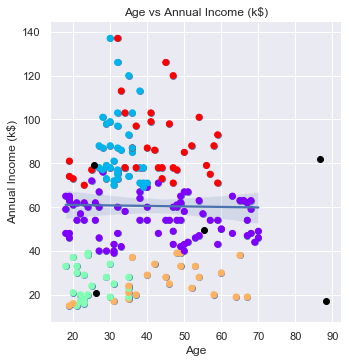

In [18]:
sns.lmplot(x='Age', y= 'Annual Income (k$)', data = mall)
plt.scatter(mall['Age'], mall['Annual Income (k$)'], c = kmeans.labels_, cmap= 'rainbow')
plt.title("Age vs Annual Income (k$)")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.scatter(centroids[: , 0],centroids[: , 1], c = 'black', label = 'Centroid')
plt.show()

In [34]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage 
import matplotlib.pyplot as plt

In [35]:
n = 10
X = [np.random.rand(10) + 1 for i in range(n)]
X = np.concatenate((X, [np.random.rand(10) - 1 for i in range(n)]), 0)

In [36]:
lnk = linkage(centroids)

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75]],
 'dcoord': [[0.0, 40.728445567908395, 40.728445567908395, 0.0],
  [0.0, 42.01259589711688, 42.01259589711688, 40.728445567908395],
  [0.0, 45.16043124019887, 45.16043124019887, 42.01259589711688],
  [0.0, 46.181035296450894, 46.181035296450894, 45.16043124019887]],
 'ivl': ['4', '1', '2', '0', '3'],
 'leaves': [4, 1, 2, 0, 3],
 'color_list': ['b', 'b', 'b', 'b']}

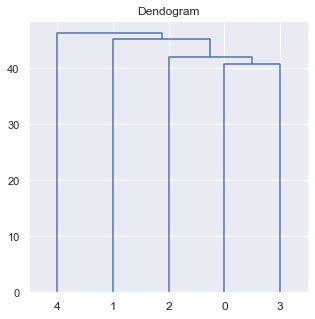

In [37]:
plt.figure(figsize=(5,5))
plt.title("Dendogram")
dendrogram(lnk)